# Bayesian Statistics

While preparing codes, I have utilized following source: https://app.datacamp.com/learn/courses/bayesian-data-analysis-in-python

#### Let's play cards

You have a regular deck of 52 well-shuffled playing cards. The deck consists of 4 suits, and there are 13 cards in each suite: ranks 2 through 10, a jack, a queen, a king, and an ace. This means that in the whole deck of 52, there are four of each distinct rank: four aces, four kings, four tens, four fives, etc.

Since there are 52 distinct cards, the probability of drawing any one particular card is 1/52. Using the two rules of probability you've learned about in the last video, calculate the probabilities of drawing some specific combinations of cards, as described in the instructions.

In [1]:
# Calculate probability of drawing a king or queen
p_king_or_queen = 

In [2]:
# Calculate probability of drawing <= 5
p_five_or_less = 

In [3]:
# Calculate probability of drawing four aces
p_all_four_aces = 

In [5]:
#pip install pymc3

In [538]:
import pandas as pd
import numpy as np
import pymc3 as pm
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az

In [539]:
iris = sns.load_dataset('iris')

In [540]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [541]:
formula = "sepal_length ~ sepal_width"

with pm.Model() as model_1:
    
    pm.GLM.from_formula(formula, data=iris)
    trace_1 = pm.sample(draws=1000, tune=500, chains=2)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, sepal_width, Intercept]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 21 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.71957165056694, but should be close to 0.8. Try to increase the number of tuning steps.


<ipython-input-80-c75cd1943a56>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_1 ,figsize=(20,20))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

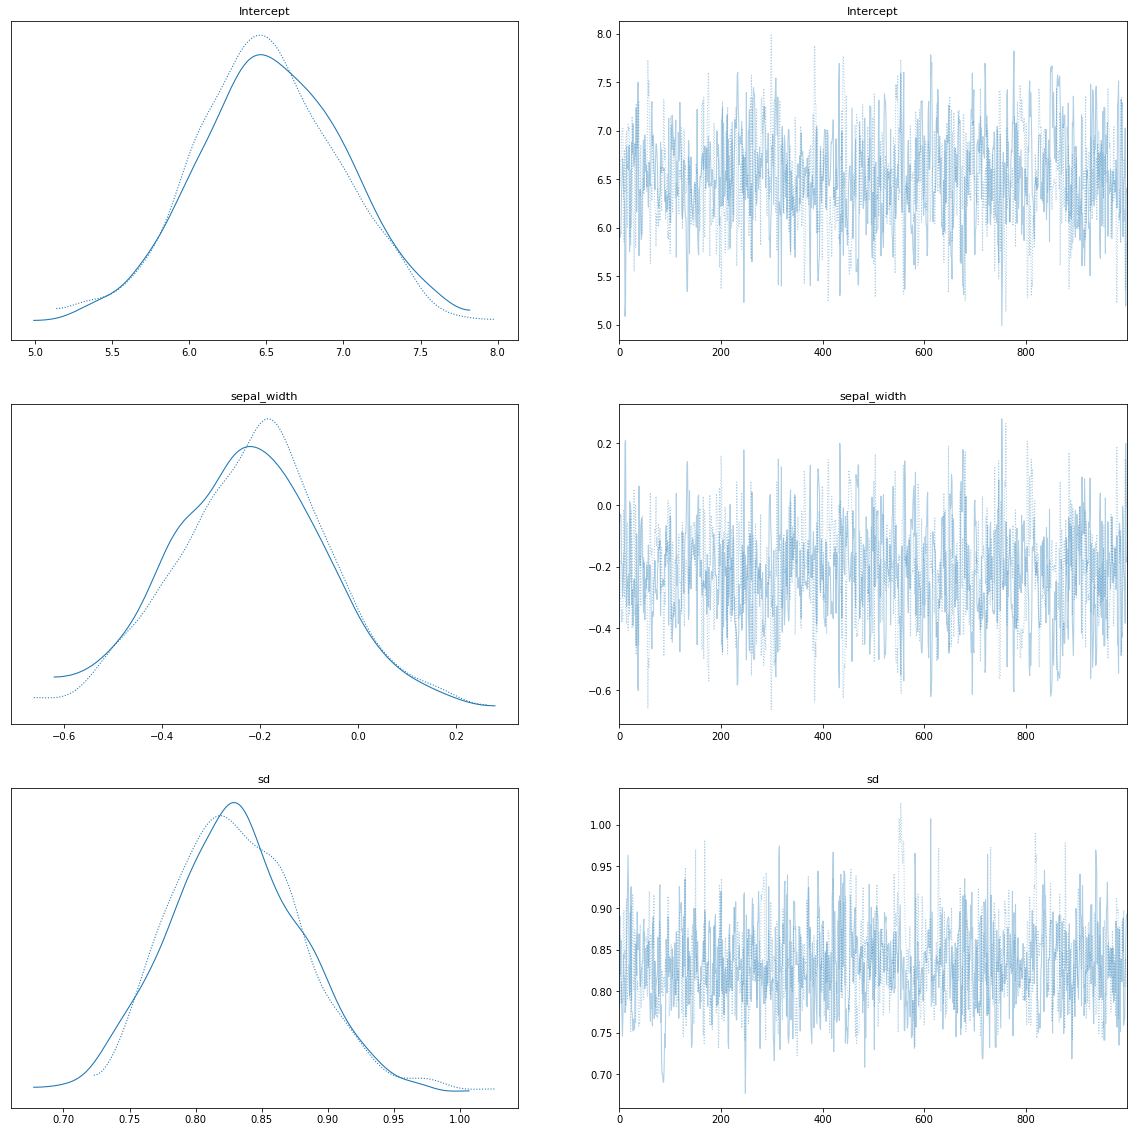

In [80]:
pm.traceplot(trace_1 ,figsize=(20,20))

<ipython-input-90-e4caf9041222>:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_1, figsize=(15,15))
Got error No model on context stack. trying to find log_likelihood in translation.


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

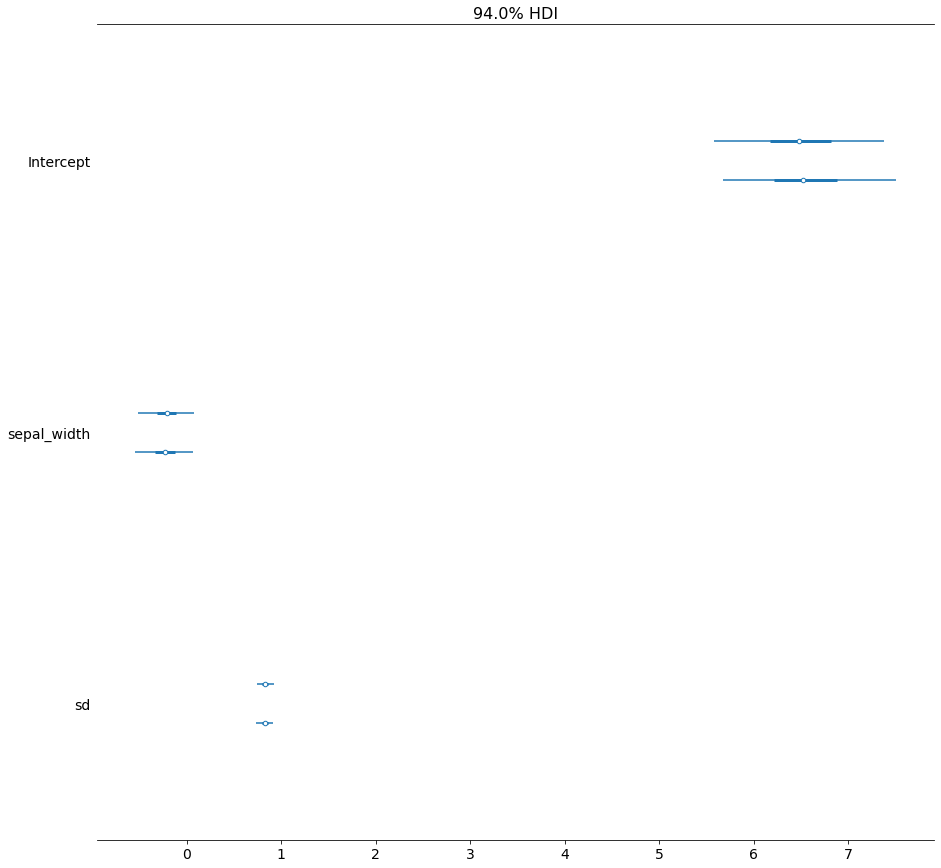

In [90]:
pm.forestplot(trace_1, figsize=(15,15))

For other arguments of pmyc3 plots, please visit: https://pymc3-testing.readthedocs.io/en/rtd-docs/api/plots.html

In [83]:
pm.summary(trace_1)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept    6.516  0.484   5.609    7.425      0.020    0.014     575.0   
sepal_width -0.219  0.157  -0.530    0.067      0.006    0.005     590.0   
sd           0.831  0.050   0.741    0.923      0.002    0.001     844.0   

             ess_tail  r_hat  
Intercept       707.0   1.01  
sepal_width     697.0   1.01  
sd              657.0   1.00

In [542]:
formula = "sepal_length ~ petal_length + petal_width"

with pm.Model() as model_2:
    
    pm.GLM.from_formula(formula, data=iris)
    trace_2 = pm.sample(draws=1000, tune=500, chains=2)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, petal_width, petal_length, Intercept]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 22 seconds.
The acceptance probability does not match the target. It is 0.8807646680481698, but should be close to 0.8. Try to increase the number of tuning steps.


<ipython-input-85-d253a3d76488>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_2 ,figsize=(20,20))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_length'}>],
       [<AxesSubplot:title={'center':'petal_width'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

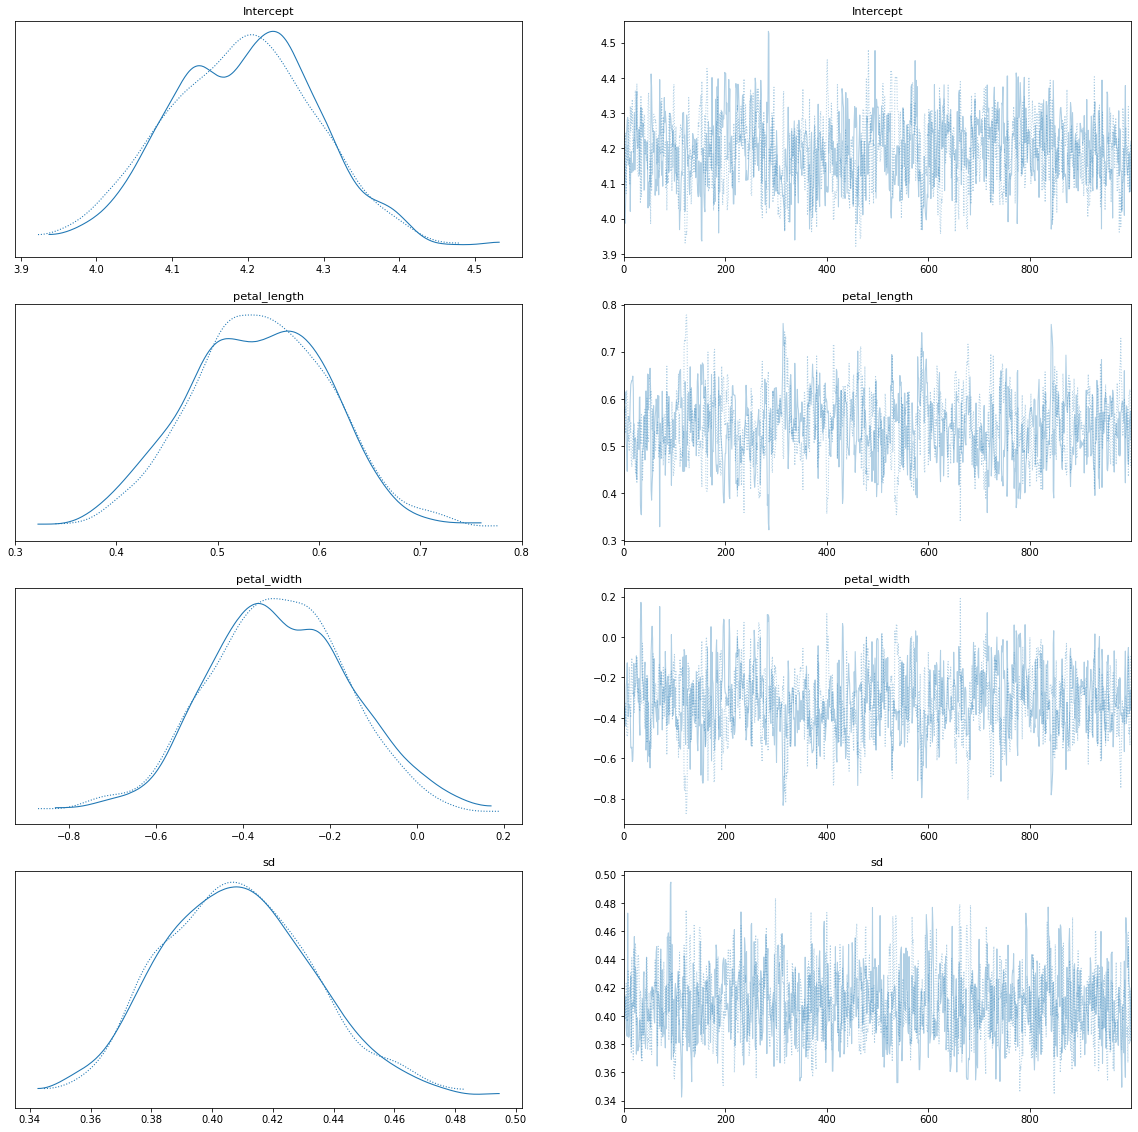

In [85]:
pm.traceplot(trace_2 ,figsize=(20,20))

<ipython-input-86-14e07039937f>:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_2, figsize=(15,15))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

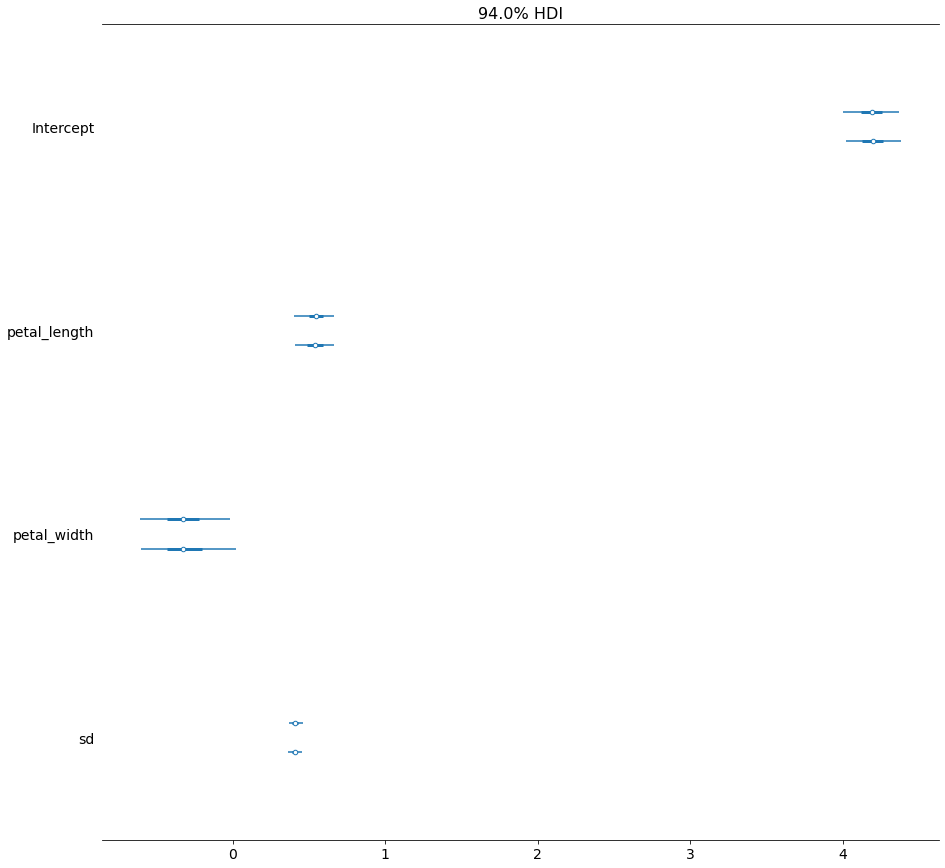

In [86]:
pm.forestplot(trace_2, figsize=(15,15))

In [87]:
pm.summary(trace_2)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept     4.192  0.097   4.020    4.384      0.004    0.003     497.0   
petal_length  0.542  0.071   0.405    0.664      0.003    0.002     438.0   
petal_width  -0.319  0.164  -0.610    0.000      0.007    0.005     499.0   
sd            0.408  0.025   0.366    0.459      0.001    0.001    1041.0   

              ess_tail  r_hat  
Intercept        781.0    1.0  
petal_length     726.0    1.0  
petal_width      813.0    1.0  
sd               921.0    1.0

In [549]:
#model1_loo = az.loo(trace_1, model_1)
#model2_loo = az.loo(trace_2, model_2)
#df_comp_loo = az.compare({"model_1": trace_1, "model_2": trace_2})
#az.plot_compare(df_comp_loo, insample_dev=False);

In [27]:
iris[-30:]

sepal_length  sepal_width  petal_length  petal_width    species
120           6.9          3.2           5.7          2.3  virginica
121           5.6          2.8           4.9          2.0  virginica
122           7.7          2.8           6.7          2.0  virginica
123           6.3          2.7           4.9          1.8  virginica
124           6.7          3.3           5.7          2.1  virginica
125           7.2          3.2           6.0          1.8  virginica
126           6.2          2.8           4.8          1.8  virginica
127           6.1          3.0           4.9          1.8  virginica
128           6.4          2.8           5.6          2.1  virginica
129           7.2          3.0           5.8          1.6  virginica
130           7.4          2.8           6.1          1.9  virginica
131           7.9          3.8           6.4          2.0  virginica
132           6.4          2.8           5.6          2.2  virginica
133           6.3          2.8           5.1          1.5  virginica
134           6.1          2.6           5.6          1.4  virginica
135           7.7          3.0           6.1          2.3  virginica
136           6.3          3.4           5.6          2.4  virginica
137           6.4          3.1           5.5          1.8  virginica
138           6.0          3.0           4.8          1.8  virginica
139           6.9          3.1           5.4          2.1  virginica
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1          1.9  virginica
143           6.8          3.2           5.9          2.3  virginica
144           6.7          3.3           5.7          2.5  virginica
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

In [28]:
test_data = iris[-30:]

In [61]:
test_data['sepal_length']

120    6.9
121    5.6
122    7.7
123    6.3
124    6.7
125    7.2
126    6.2
127    6.1
128    6.4
129    7.2
130    7.4
131    7.9
132    6.4
133    6.3
134    6.1
135    7.7
136    6.3
137    6.4
138    6.0
139    6.9
140    6.7
141    6.9
142    5.8
143    6.8
144    6.7
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, dtype: float64

In [58]:
formula = "sepal_length ~ sepal_width"

with pm.Model() as model_3:
    
    pm.GLM.from_formula(formula, data=iris)
    trace_3 = pm.sample(draws=1000, tune=500, chains=2)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_3)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, sepal_width, Intercept]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 17 seconds.
The acceptance probability does not match the target. It is 0.8864347483915738, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8791429224819661, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


In [101]:
print(posterior_predictive['y'])

[[ 60.19024182  51.66794875  26.49757464 ...  57.66590999  10.07095839
   56.56969885]
 [ 53.71678992   6.48956646  69.0409738  ...  63.59952874  39.05388374
   54.79634454]
 [ 58.52205553  77.08264191  37.78869906 ...  59.6456106   59.68935165
   71.75524767]
 ...
 [ 66.8451503    1.35549123  58.00685116 ...  59.79083631  74.12065552
   76.36875298]
 [ 91.04031009  72.3209304   86.17476183 ...  15.12235066  43.29781244
   76.32750999]
 [117.66706778  72.25580288  48.48160197 ...  23.33840532  20.94991841
   77.76729473]]


#### Now we have a distribution for each observation

<AxesSubplot:title={'center':'x'}>

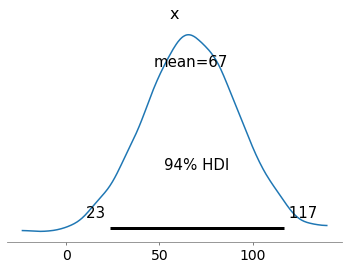

In [106]:
pm.plot_posterior(posterior_predictive['y'][:,0])

<AxesSubplot:title={'center':'x'}>

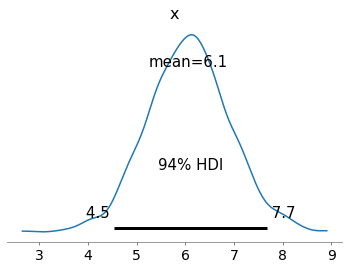

In [64]:
pm.plot_posterior(posterior_predictive['y'][:,119])

In [66]:
len(posterior_predictive['y'][:,119]) #2000 = 1000 draws * 2 chains

2000

In [67]:
errors=[]
for index, test_example in test_data.iterrows():
    error=posterior_predictive['y'][:,index] - test_example['sepal_length']
    errors.append(error)
    
error_distribution=np.array(errors).reshape(-1)
error_distribution.shape

(30,)

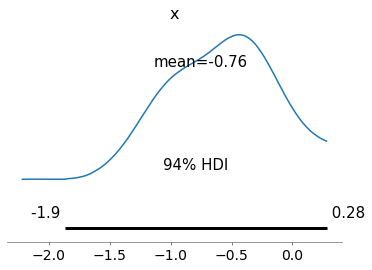

In [92]:
# Plot the error distribution
pm.plot_posterior(error_distribution)
plt.show()

### Assign prior distributions

https://docs.pymc.io/en/latest/api/distributions/generated/pymc.Binomial.html

In [527]:
Y = iris['sepal_length']
X1 = iris['sepal_width']
X2 = iris['petal_length']
X3 = iris['petal_width']

with pm.Model() as model_4:
    beta0 = pm.Normal("beta0", 0.0, 1.0) #Change to uniform distribution to see what happens (gamma, halfnormal, uniform, etc.)
    beta1 = pm.Normal("beta1", 0.0, 1.0)
    beta2 = pm.Normal("beta2", 0.0, 1.0)
    beta3 = pm.Normal("beta3", 0.0, 1.0)

    mean_y = beta0 + beta1 * X1 + beta2 * X2 + beta3 * X3
 
    pm.Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)
    trace_4 = pm.sample(draws=1000, tune=500, chains=2)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_4)

C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta3, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 100 seconds.
The acceptance probability does not match the target. It is 0.9078976997103655, but should be close to 0.8. Try to increase the number of tuning steps.


<ipython-input-528-f66afdc06614>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_4 ,figsize=(20,20))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'beta0'}>,
        <AxesSubplot:title={'center':'beta0'}>],
       [<AxesSubplot:title={'center':'beta1'}>,
        <AxesSubplot:title={'center':'beta1'}>],
       [<AxesSubplot:title={'center':'beta2'}>,
        <AxesSubplot:title={'center':'beta2'}>],
       [<AxesSubplot:title={'center':'beta3'}>,
        <AxesSubplot:title={'center':'beta3'}>]], dtype=object)

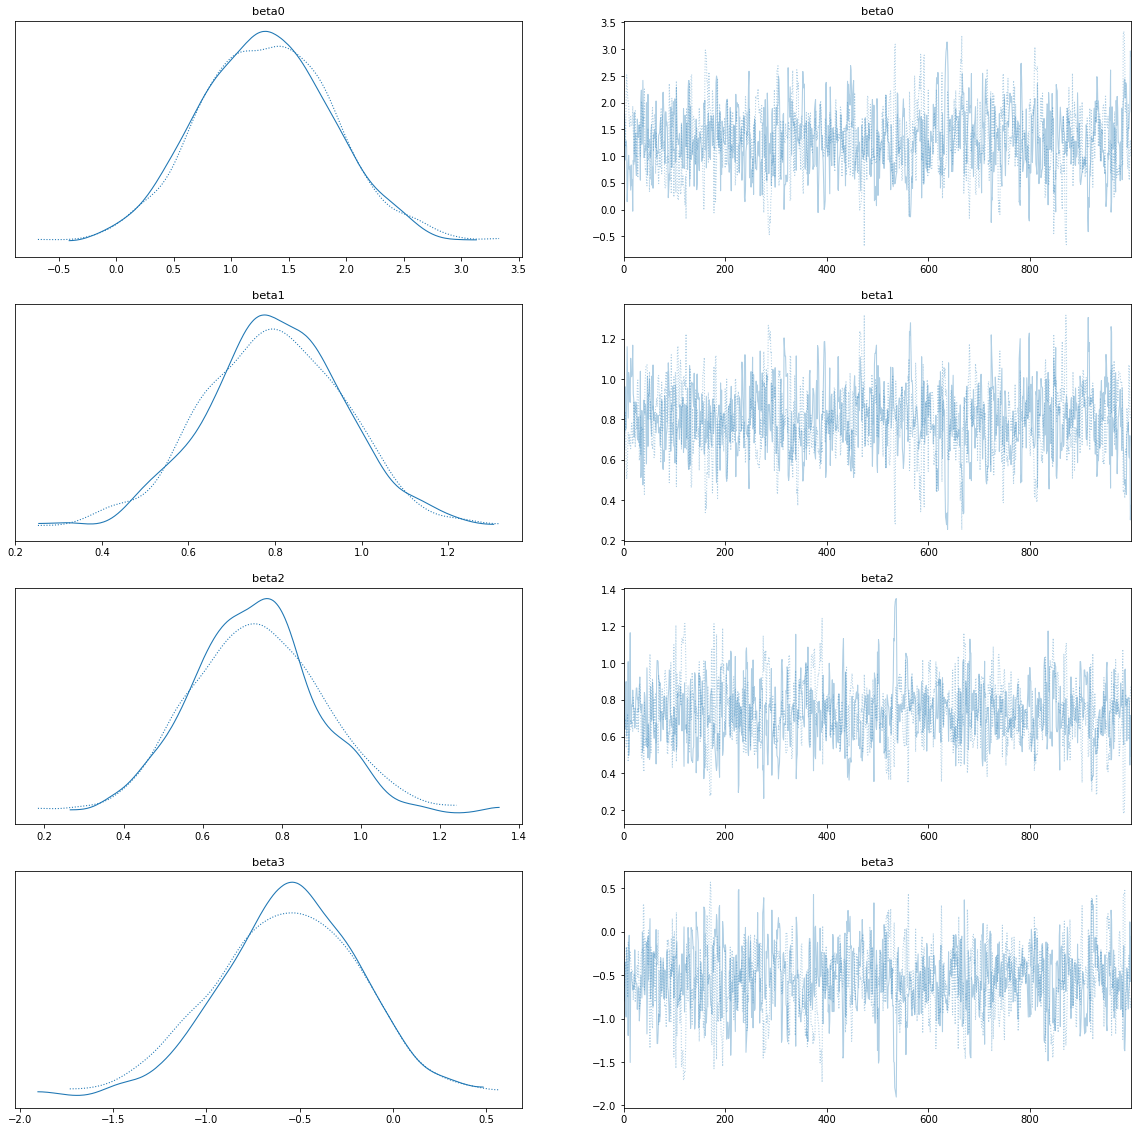

In [528]:
pm.traceplot(trace_4 ,figsize=(20,20))

The prior belief changes the outcome. That's how, we think of Bayes as a degree of belief

#### Updating priors


https://docs.pymc.io/en/v3/pymc-examples/examples/pymc3_howto/updating_priors.html

We want to keep probability density of posterior draws, following function does so, by using kernel density estimation. Function takes samples, and convert them into distributions.

In [529]:
def from_posterior(param, samples):
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    x = np.linspace(smin, smax, 100)
    y = stats.gaussian_kde(samples)(x)

    # what was never sampled should have a small probability but not 0,
    # so we'll extend the domain and use linear approximation of density on it
    x = np.concatenate([[x[0] - 3 * width], x, [x[-1] + 3 * width]])
    y = np.concatenate([[0], y, [0]])
    return Interpolated(param, x, y)

Store means of coefficients, from the posterior draws of the model above.

In [530]:
beta0_true = np.mean(trace_4.get_values('beta0'))
beta1_true = np.mean(trace_4.get_values('beta1'))
beta2_true = np.mean(trace_4.get_values('beta2'))
beta3_true = np.mean(trace_4.get_values('beta3'))

Now we will use posterior draws of previous model as priors of the new series models.

In [532]:
from pymc3 import Model, Normal, Slice, sample
from scipy import stats
from pymc3.distributions import Interpolated

trace = trace_4
traces =  [trace]

model = Model()
with model:
    # Priors are posteriors from previous iteration
    beta0 = from_posterior("beta0", trace["beta0"])
    beta1 = from_posterior("beta1", trace["beta1"])
    beta2 = from_posterior("beta2", trace["beta2"])
    beta3 = from_posterior("beta3", trace["beta3"])

    # Expected value of outcome
    mean_y = beta0 + beta1 * X1 + beta2 * X2 + beta3 * X3

    # Likelihood (sampling distribution) of observations
    Y_obs = Normal("Y_obs", mu=mean_y, sigma=1, observed=Y)

    # draw 10000 posterior samples
    trace = sample(1000) 
    # it is just another way of sampling data, iterates 1000 draws and 1000 tunes
    traces.append(trace)

C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta3, beta2, beta1, beta0]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 25 seconds.


Posterior distributions after 2 iterations.


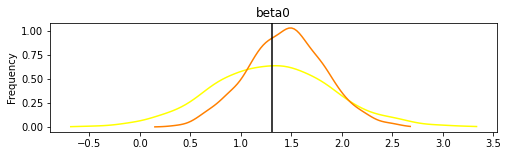

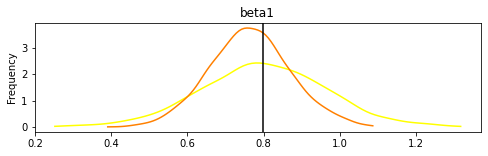

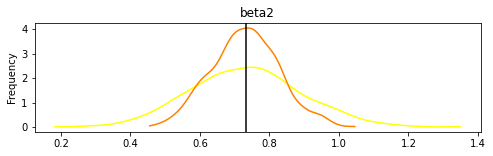

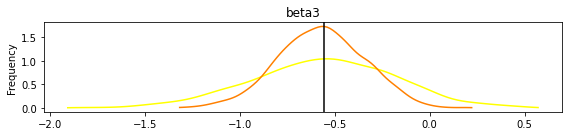

In [533]:
import matplotlib as mpl
import matplotlib.pyplot as plt

print("Posterior distributions after " + str(len(traces)) + " iterations.")
cmap = mpl.cm.autumn
for param in ["beta0", "beta1", "beta2", "beta3"]:
    plt.figure(figsize=(8, 2))
    for update_i, trace in enumerate(traces):
        samples = trace[param]
        smin, smax = np.min(samples), np.max(samples)
        x = np.linspace(smin, smax, 100)
        y = stats.gaussian_kde(samples)(x)
        plt.plot(x, y, color=cmap(1 - update_i / len(traces))) #in each step color gets from yellow to red
    plt.axvline({"beta0": beta0_true, "beta1": beta1_true, "beta2": beta2_true, "beta3": beta3_true}[param], c="k")
    plt.ylabel("Frequency")
    plt.title(param)

plt.tight_layout();

## Let's run a Bayesian model within the Brazil - MST data

In [198]:
del model_1, model_2, model_3, model_4, trace_1, trace_2, trace_3, trace_4

NameError: name 'model_2' is not defined

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_br = pd.read_stata('C:/Users/user/Desktop/Advanced Data Analysis with Python/Datasets/Brazil MST data 2005.dta')
data_br.columns

Index(['ibgecode', 'state', 'latitude', 'longitude', 'invasions_count',
       'reforms_count', 'invasions_count_cum', 'invasions_dum', 'log_income',
       'ln_agriculturalproductivity', 'codigo', 'PT_voteshare',
       'infantmortality', 'BF_coverage1000', 'log_invasions_count_cum',
       'log_intended_lands1995'],
      dtype='object')

In [552]:
data_br = data_br.dropna(axis=0).reset_index()

In [553]:
data_br

index  ibgecode state  latitude  longitude  invasions_count  \
0         0   1100015    RO   -11.944    -61.907              0.0   
1         1   1100023    RO    -9.913    -63.041              4.0   
2         2   1100031    RO   -13.498    -60.554              0.0   
3         3   1100049    RO   -11.438    -61.448              0.0   
4         4   1100056    RO   -13.189    -60.812              0.0   
...     ...       ...   ...       ...        ...              ...   
4912   5589   5221700    GO   -15.498    -49.688              0.0   
4913   5590   5221809    GO   -17.464    -48.203              1.0   
4914   5592   5221908    GO   -17.045    -49.631              1.0   
4915   5593   5222005    GO   -16.742    -48.516              0.0   
4916   5595   5222203    GO   -15.038    -47.059              0.0   

      reforms_count  invasions_count_cum  invasions_dum  log_income  \
0               0.0                  1.0            0.0    5.704232   
1               0.0                  9.0            1.0    6.048920   
2               0.0                  0.0            0.0    5.670812   
3               0.0                  1.0            0.0    6.012553   
4               0.0                  1.0            0.0    5.941381   
...             ...                  ...            ...         ...   
4912            0.0                  1.0            0.0    5.770771   
4913            0.0                  1.0            1.0    5.977923   
4914            0.0                  1.0            1.0    5.926579   
4915            0.0                  0.0            0.0    6.217075   
4916            0.0                  1.0            0.0    5.546036   

      ln_agriculturalproductivity  codigo  PT_voteshare  infantmortality  \
0                        4.058813  110001      0.143244        23.508137   
1                        4.563440  110002      0.084352        13.881177   
2                        4.332453  110003      0.238043         0.000000   
3                        4.106792  110004      0.175060        16.358463   
4                        4.385105  110005      0.295203        19.801981   
...                           ...     ...           ...              ...   
4912                     4.903193  522170      0.064962        17.647058   
4913                     4.420553  522180      0.026652         0.000000   
4914                     4.099277  522190      0.027577        57.142857   
4915                     4.480215  522200      0.116532        36.269428   
4916                     4.487371  522220      0.020011         0.000000   

      BF_coverage1000  log_invasions_count_cum  log_intended_lands1995  
0           70.383179                 0.693147               12.880941  
1           46.206680                 2.302585               12.876694  
2           13.717052                 0.000000               12.372421  
3           78.762436                 0.693147               12.665471  
4           72.037315                 0.693147               13.052385  
...               ...                      ...                     ...  
4912        69.318916                 0.693147               11.785385  
4913        54.384357                 0.693147               11.727258  
4914        23.749651                 0.693147               11.760918  
4915         3.071108                 0.000000               11.895869  
4916        71.208298                 0.693147               12.212556  

[4917 rows x 17 columns]

In [152]:
formula_br = 'BF_coverage1000 ~ log_income + ln_agriculturalproductivity + PT_voteshare + infantmortality + log_invasions_count_cum'

In [153]:
with pm.Model() as model_1:
    
    pm.GLM.from_formula(formula_br, data=data_br)
    trace_1 = pm.sample(draws=1000, tune=500, chains=2)
    posterior_predictive = pm.fast_sample_posterior_predictive(trace_1)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, log_invasions_count_cum, infantmortality, PT_voteshare, ln_agriculturalproductivity, log_income, Intercept]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 241 seconds.
The acceptance probability does not match the target. It is 0.9899052498954761, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9485936776495346, but should be close to 0.8. Try to increase the number of tuning steps.


<ipython-input-154-618162626805>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_4 ,figsize=(25,25))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'log_income'}>,
        <AxesSubplot:title={'center':'log_income'}>],
       [<AxesSubplot:title={'center':'ln_agriculturalproductivity'}>,
        <AxesSubplot:title={'center':'ln_agriculturalproductivity'}>],
       [<AxesSubplot:title={'center':'PT_voteshare'}>,
        <AxesSubplot:title={'center':'PT_voteshare'}>],
       [<AxesSubplot:title={'center':'infantmortality'}>,
        <AxesSubplot:title={'center':'infantmortality'}>],
       [<AxesSubplot:title={'center':'log_invasions_count_cum'}>,
        <AxesSubplot:title={'center':'log_invasions_count_cum'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

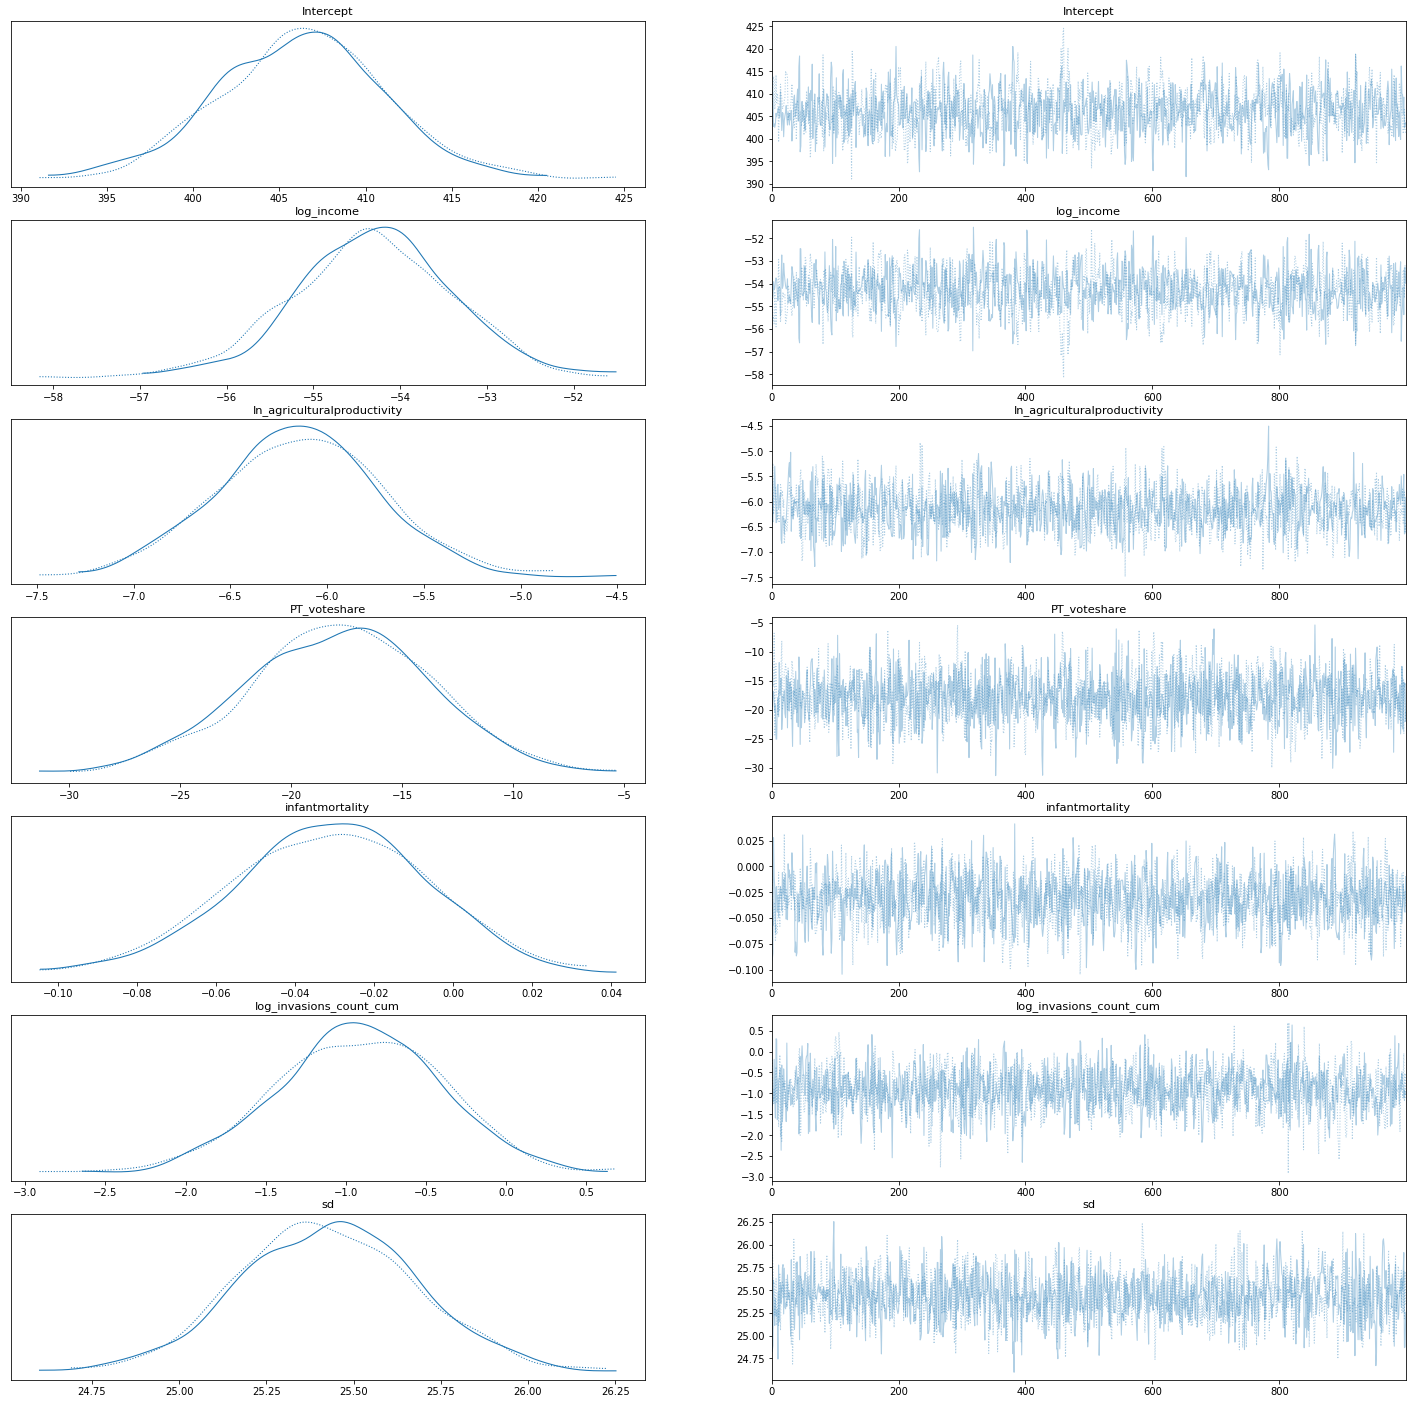

In [154]:
pm.traceplot(trace_1 ,figsize=(25,25))

<ipython-input-157-72ad679d8103>:1: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(trace_4, figsize=(15,15))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'94.0% HDI'}>], dtype=object)

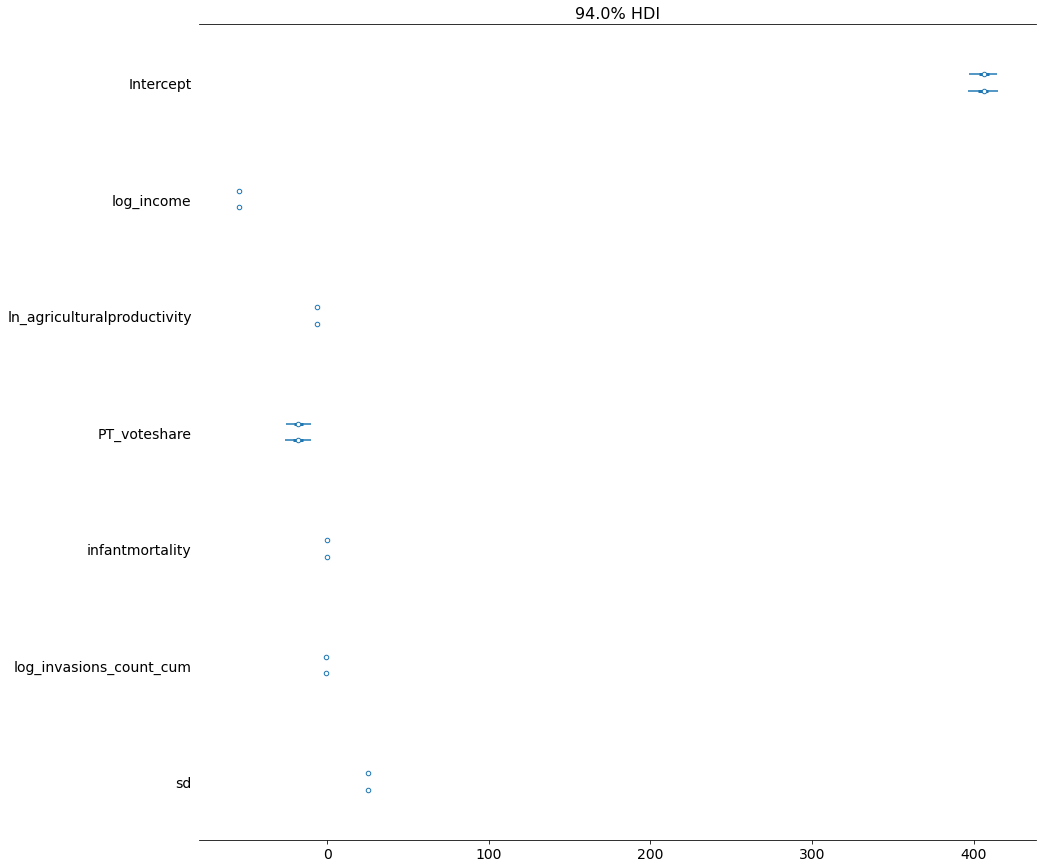

In [157]:
pm.forestplot(trace_1, figsize=(15,15))

In [158]:
pm.summary(trace_1)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd   hdi_3%  hdi_97%  mcse_mean  \
Intercept                    406.301  4.786  396.680  414.616      0.145   
log_income                   -54.309  0.912  -55.889  -52.465      0.029   
ln_agriculturalproductivity   -6.147  0.417   -6.987   -5.409      0.011   
PT_voteshare                 -17.855  4.229  -25.870  -10.074      0.101   
infantmortality               -0.031  0.025   -0.079    0.012      0.001   
log_invasions_count_cum       -0.920  0.518   -1.906    0.006      0.012   
sd                            25.427  0.252   24.996   25.942      0.006   

                             mcse_sd  ess_bulk  ess_tail  r_hat  
Intercept                      0.102    1100.0    1199.0    1.0  
log_income                     0.020    1009.0    1046.0    1.0  
ln_agriculturalproductivity    0.008    1501.0    1200.0    1.0  
PT_voteshare                   0.073    1742.0    1410.0    1.0  
infantmortality                0.000    1663.0    1257.0    1.0  
log_invasions_count_cum        0.009    1719.0    1225.0    1.0  
sd                             0.004    1802.0    1485.0    1.0

<AxesSubplot:title={'center':'x'}>

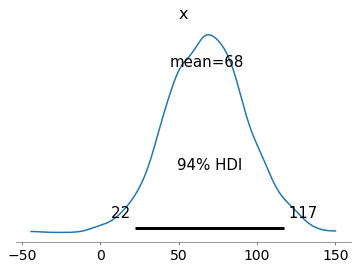

In [159]:
pm.plot_posterior(posterior_predictive['y'][:,0])

In [160]:
test_data = data_br.sample(500)

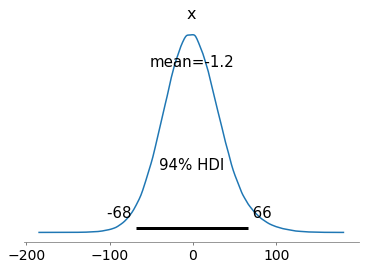

In [161]:
errors=[]
for index, test_example in test_data.iterrows():
    error=posterior_predictive['y'][:,index] - test_example['BF_coverage1000']
    errors.append(error)
    
error_distribution=np.array(errors).reshape(-1)
pm.plot_posterior(error_distribution)
plt.show()

In [168]:
formula_br = 'BF_coverage1000 ~ log_invasions_count_cum'

with pm.Model() as model_2:
    
    pm.GLM.from_formula(formula_br, data=data_br)
    trace_2 = pm.sample(draws=1000, tune=500, chains=2)

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, log_invasions_count_cum, Intercept]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 53 seconds.
The acceptance probability does not match the target. It is 0.9587079939293767, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9492483007401522, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


In [332]:
pm.traceplot(trace_2, figsize=(25,25))

NameError: name 'trace_2' is not defined

#### Scale DV and update priors

In [511]:
#data_br_small = data_br.sample(100)

Y = data_br['BF_coverage1000']
X1 = data_br['log_invasions_count_cum']
X2 = data_br['log_income']

While iteration number increases, scaling our data becomes much more important

In [512]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [513]:
scaled_data = scaleColumns(data_br,['BF_coverage1000'])
Y = data_br['BF_coverage1000']

In [514]:
with pm.Model() as model_3:
    beta0 = pm.Normal("beta0", 0, 1)
    beta1 = pm.Normal("beta1", 0, 1)
    beta2 = pm.Normal("beta2", 0, 1)
    sigma_y = pm.Normal('sigma_y', 1)
    
    mean_y = beta0 + beta1 * X1 + beta2 * X2
    
    pm.Normal("Y_obs", mu=mean_y, sigma=sigma_y, observed=Y)
    trace_3 = pm.sample(draws=1000, tune=500, chains=2)

C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 40 seconds.
The acceptance probability does not match the target. It is 0.9028128882888656, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9084567833177952, but should be close to 0.8. Try to increase the number of tuning steps.


<ipython-input-515-9b84d06c2329>:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_3, figsize=(25,25))
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'beta0'}>,
        <AxesSubplot:title={'center':'beta0'}>],
       [<AxesSubplot:title={'center':'beta1'}>,
        <AxesSubplot:title={'center':'beta1'}>],
       [<AxesSubplot:title={'center':'beta2'}>,
        <AxesSubplot:title={'center':'beta2'}>],
       [<AxesSubplot:title={'center':'sigma_y'}>,
        <AxesSubplot:title={'center':'sigma_y'}>]], dtype=object)

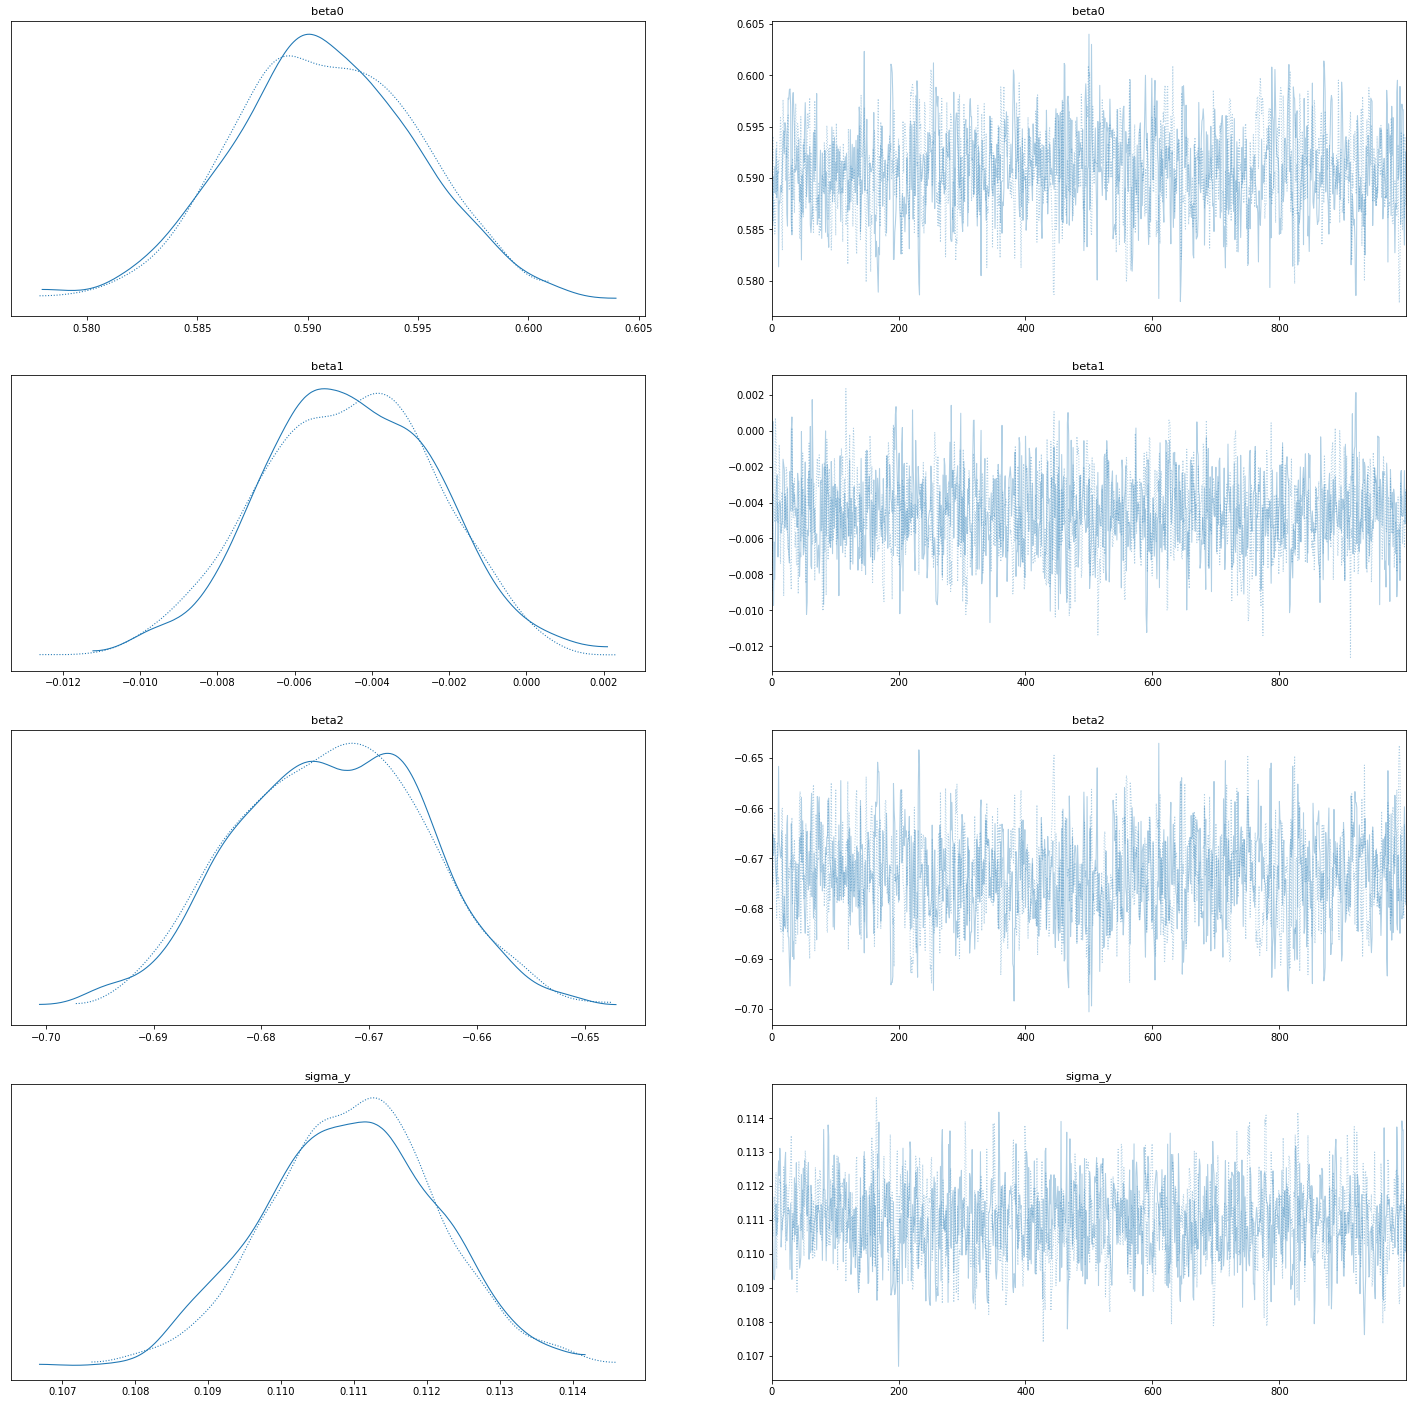

In [515]:
pm.traceplot(trace_3, figsize=(25,25))

In [516]:
pm.summary(trace_3)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta0    0.591  0.004   0.583    0.599        0.0      0.0    1003.0   
beta1   -0.005  0.002  -0.009   -0.001        0.0      0.0    1464.0   
beta2   -0.674  0.009  -0.689   -0.656        0.0      0.0    1022.0   
sigma_y  0.111  0.001   0.109    0.113        0.0      0.0    1173.0   

         ess_tail  r_hat  
beta0       964.0    1.0  
beta1      1101.0    1.0  
beta2      1114.0    1.0  
sigma_y     999.0    1.0

#### Let's update prior belief

In [517]:
trace = trace_3
traces = [trace]

for _ in range(10):

    model = Model()
    with model:
        # Priors are posteriors from previous iteration
        beta0 = from_posterior("beta0", trace["beta0"])
        beta1 = from_posterior("beta1", trace["beta1"])
        beta2 = from_posterior("beta2", trace["beta2"])
        sigma_y = from_posterior("sigma_y", trace["sigma_y"])

        # Expected value of outcome
        mean_y = beta0 + beta1 * X1 + beta2 * X2

        # Likelihood (sampling distribution) of observations
        Y_obs = Normal("Y_obs", mu=mean_y, sigma=sigma_y, observed=Y)

        # draw 10000 posterior samples
        trace = pm.sample(draws=1000, tune=500, chains=2)
        traces.append(trace)

C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 23 seconds.
The acceptance probability does not match the target. It is 0.8837771439204932, but should be close to 0.8. Try to increase the number of tuning steps.
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 18 seconds.
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 18 seconds.
The acceptance probability does not match the target. It is 0.9096749644302929, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 19 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 17 seconds.
The acceptance probability does not match the target. It is 0.6739312284567395, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 17 seconds.
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 19 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 19 seconds.
The acceptance probability does not match the target. It is 0.9117232892029931, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 18 seconds.
C:\Users\user\miniconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, beta2, beta1, beta0]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 18 seconds.


Posterior distributions after 11 iterations.


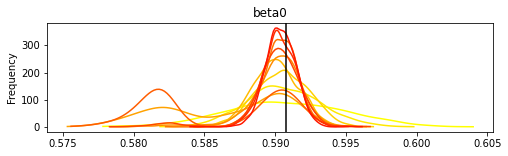

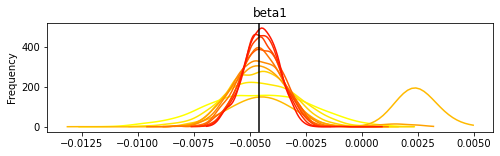

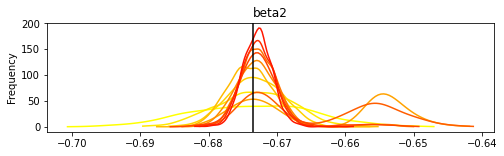

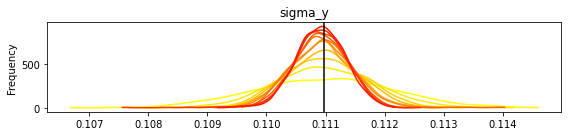

In [518]:
beta0_true = np.mean(trace_3.get_values('beta0'))
beta1_true = np.mean(trace_3.get_values('beta1'))
beta2_true = np.mean(trace_3.get_values('beta2'))
sigma_y_true = np.mean(trace_3.get_values('sigma_y'))

print("Posterior distributions after " + str(len(traces)) + " iterations.")
cmap = mpl.cm.autumn
for param in ["beta0", "beta1", "beta2", 'sigma_y']:
    plt.figure(figsize=(8, 2))
    for update_i, trace in enumerate(traces):
        samples = trace[param]
        smin, smax = np.min(samples), np.max(samples)
        x = np.linspace(smin, smax, 100)
        y = stats.gaussian_kde(samples)(x)
        plt.plot(x, y, color=cmap(1 - update_i / len(traces))) #in each step color gets from yellow to red
    plt.axvline({"beta0": beta0_true, "beta1": beta1_true, "beta2": beta2_true,  "sigma_y": sigma_y_true}[param], c="k")
    plt.ylabel("Frequency")
    plt.title(param)

plt.tight_layout();

In [519]:
traces

[<MultiTrace: 2 chains, 1000 iterations, 4 variables>,
 <MultiTrace: 2 chains, 1000 iterations, 8 variables>,
 <MultiTrace: 2 chains, 1000 iterations, 8 variables>,
 <MultiTrace: 2 chains, 1000 iterations, 8 variables>,
 <MultiTrace: 2 chains, 1000 iterations, 8 variables>,
 <MultiTrace: 2 chains, 1000 iterations, 8 variables>,
 <MultiTrace: 2 chains, 1000 iterations, 8 variables>,
 <MultiTrace: 2 chains, 1000 iterations, 8 variables>,
 <MultiTrace: 2 chains, 1000 iterations, 8 variables>,
 <MultiTrace: 2 chains, 1000 iterations, 8 variables>,
 <MultiTrace: 2 chains, 1000 iterations, 8 variables>]

In [520]:
traces[1].varnames

['beta0_interval__',
 'beta1_interval__',
 'beta2_interval__',
 'sigma_y_interval__',
 'beta0',
 'beta1',
 'beta2',
 'sigma_y']

Pymc stores standardized version automatically, adding "_interval__" as suffix

In [521]:
trace_4 = traces[9]

In [522]:
pm.summary(trace_4)

Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\user\miniconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
beta0    0.590  0.001   0.588    0.592        0.0      0.0    1767.0   
beta1   -0.004  0.001  -0.006   -0.003        0.0      0.0    1931.0   
beta2   -0.673  0.002  -0.677   -0.668        0.0      0.0    1961.0   
sigma_y  0.111  0.000   0.110    0.112        0.0      0.0    1671.0   

         ess_tail  r_hat  
beta0      1463.0    1.0  
beta1      1387.0    1.0  
beta2      1572.0    1.0  
sigma_y     919.0    1.0

#### Prediction

In [523]:
intercept_mean = np.mean(trace_4.get_values('beta0')) 
invasion_mean = np.mean(trace_4.get_values('beta1')) 
income_mean = np.mean(trace_4.get_values('beta2')) 
sd_mean = np.mean(trace_4.get_values('sigma_y')) 

In [524]:
predicted_BF_per_invasion = {}
for inv in range(0,20):
    pred_mean = (intercept_mean + invasion_mean * inv + income_mean)
    volume_pred = np.random.normal(pred_mean, sd_mean, size=1000)
    BF_pred = inv * volume_pred
    predicted_BF_per_invasion.update({inv: BF_pred})

<ipython-input-525-e98bbf7f349f>:2: DeprecationWarning: The function `forestplot` from PyMC3 is just an alias for `plot_forest` from ArviZ. Please switch to `pymc3.plot_forest` or `arviz.plot_forest`.
  pm.forestplot(predicted_BF_per_invasion)


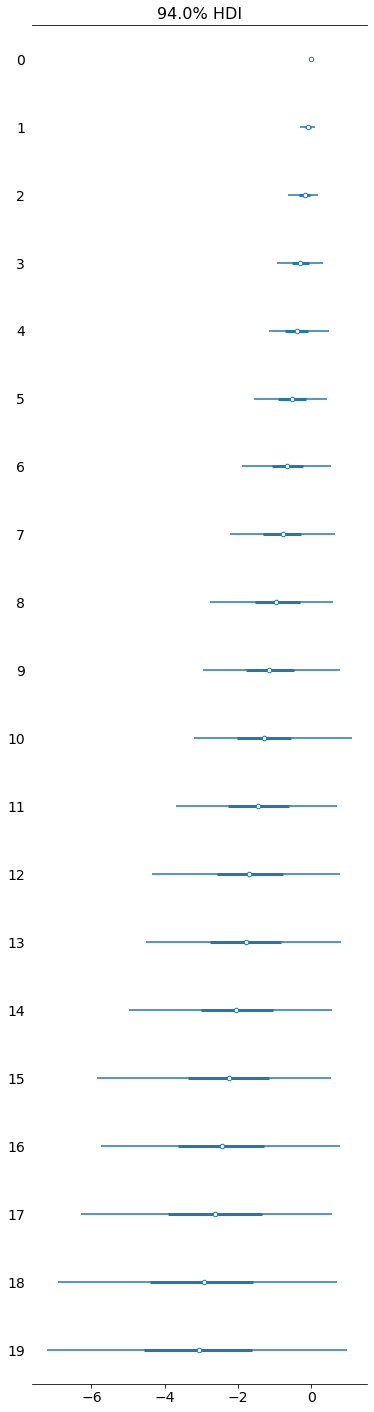

In [525]:
# Draw a forest plot of predicted BF for all invasions
pm.forestplot(predicted_BF_per_invasion)
plt.show()

In [526]:
print(pm.hdi(predicted_BF_per_invasion[18], hdi_prob=0.94)) #Change the hdi limits

[-6.91177074  0.71411801]


By additional invasions, the mean of expected Bolsa Familia increases. However, uncertainity about the Bolsa Familia increases as well.